Talller 2

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


Punto 1

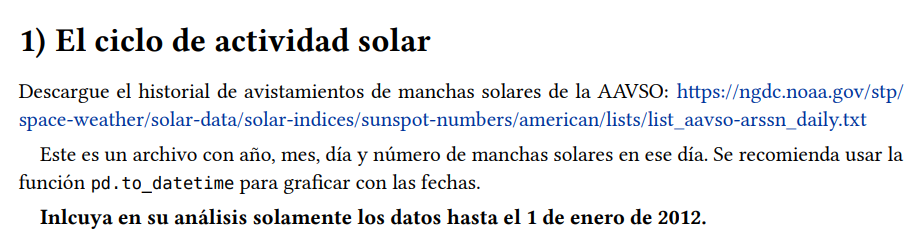

In [178]:
datos=pd.read_fwf('Datos_punto1.txt',names=['Year','Month','Day','SSN']).drop(0)
datos['Fecha']=pd.to_datetime(datos[['Year', 'Month', 'Day']])
datos=datos[datos['Fecha']<='2012-01-01']
datos

,Year,Month,Day,SSN,Fecha
1,1945,1,1,10.0,1945-01-01
2,1945,1,2,0.0,1945-01-02
3,1945,1,3,1.0,1945-01-03
4,1945,1,4,2.0,1945-01-04
5,1945,1,5,11.0,1945-01-05
...,...,...,...,...,...
24468,2011,12,28,62.0,2011-12-28
24469,2011,12,29,67.0,2011-12-29
24470,2011,12,30,58.0,2011-12-30
24471,2011,12,31,55.0,2011-12-31


1.1 Período del ciclo solar
\
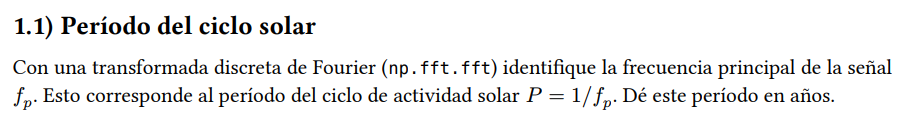


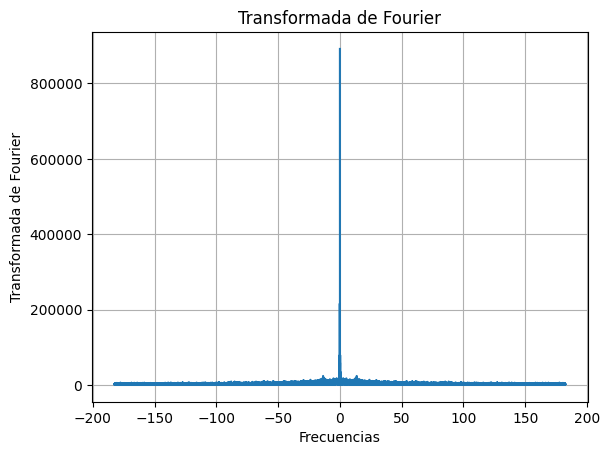

Frecuencia Principal 0.07457502451781628
Periodo del ciclo Solar 13.40931506849315


In [179]:
fourier=np.abs(np.fft.fft(datos['SSN']))
frecuencias=np.fft.fftfreq(len(fourier),d=1/365)
plt.plot(frecuencias,fourier)
plt.xlabel("Frecuencias")
plt.ylabel("Transformada de Fourier")
plt.title("Transformada de Fourier")
plt.grid()
plt.show()
frecuencia_principal=frecuencias[np.argmax(fourier[1:])]
print('Frecuencia Principal',frecuencia_principal)
Periodo_ciclo_solar=1/frecuencia_principal
print('Periodo del ciclo Solar',Periodo_ciclo_solar)

1.2) Reduccion de ruido
\
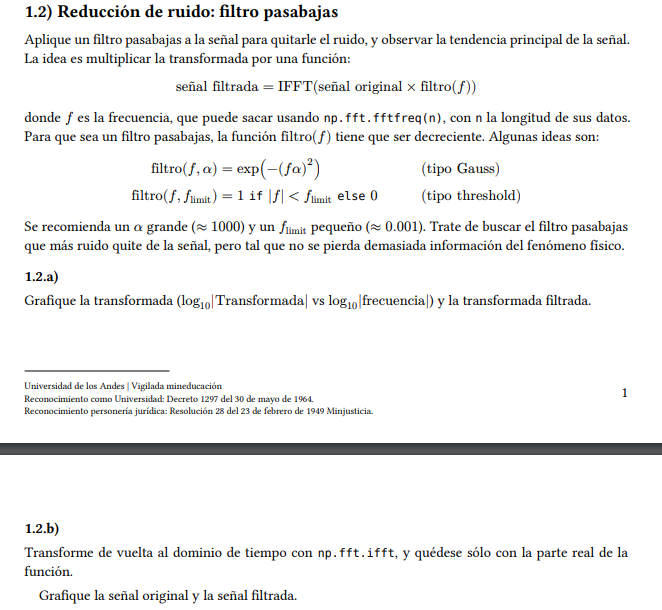

1.2a)

In [180]:

def filtro_pasabajas_gauss(x,a=100):
   resultado=np.exp(-(x*a)**2)
   return resultado
def filtro_pasabajas_threshold(x):
    f_limite=0.001
    senal=[]
    for i in range(len(x)):
        if np.abs(x[i])<f_limite:
            senal.append(1*x[i])
        else:
            senal.append(0)
    return senal
senal_filtro_gauss=np.fft.ifft(filtro_pasabajas_gauss(frecuencias)*fourier)
senal_filtro_threshold=np.fft.ifft(filtro_pasabajas_threshold(frecuencias)*fourier)

C:\Users\Thomas\AppData\Local\Temp\ipykernel_9504\812559942.py:2: RuntimeWarning: divide by zero encountered in log10
  ax[0,0].plot(np.log10(frecuencias),np.log10(senal_filtro_gauss))
C:\Users\Thomas\AppData\Local\Temp\ipykernel_9504\812559942.py:2: RuntimeWarning: invalid value encountered in log10
  ax[0,0].plot(np.log10(frecuencias),np.log10(senal_filtro_gauss))
C:\Users\Thomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_9504\812559942.py:8: RuntimeWarning: divide by zero encountered in log10
  ax[0,1].plot(np.log10(frecuencias),np.log10(senal_filtro_threshold))
C:\Users\Thomas\AppData\Local\Temp\ipykernel_9504\812559942.py:8: RuntimeWarning: invalid value encountered in log10
  ax[0,1].plot(np.log10(frecuencias),np.log10(s

              FILTROS                   /        Transformadas Filtradas


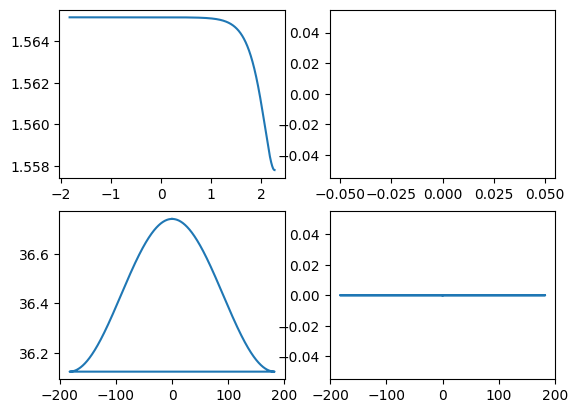

In [181]:
fig,ax=plt.subplots(2,2)
ax[0,0].plot(np.log10(frecuencias),np.log10(senal_filtro_gauss))


ax[1,0].plot(frecuencias,senal_filtro_gauss)


ax[0,1].plot(np.log10(frecuencias),np.log10(senal_filtro_threshold))


ax[1,1].plot(frecuencias,senal_filtro_threshold)
print('              FILTROS                   /        Transformadas Filtradas')
plt.show()



1.2b)


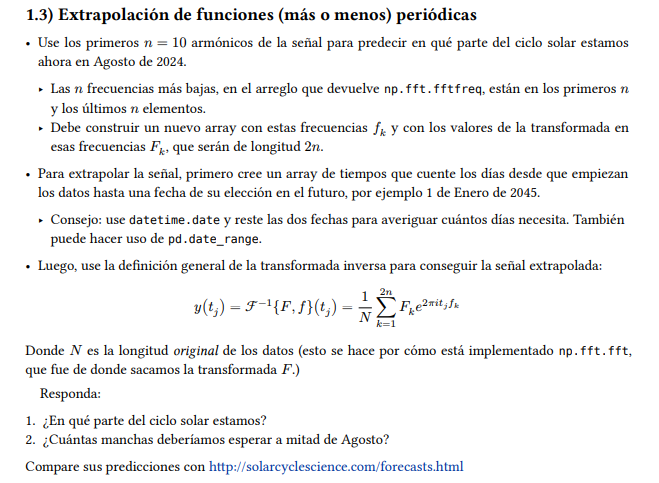

In [182]:
frec_armonico = frecuencias[:10]
four_armonico= fourier[:10]

años_21 = pd.date_range(start=pd.to_datetime("2024-08-01"), periods=365*21, freq='D')
dias = (años_21 - pd.to_datetime("2024-08-01")).days

y = np.zeros(len(dias))
for k in range(10):
    y+= four_armonico[k] * np.cos(2 * np.pi * frec_armonico[k] * dias)

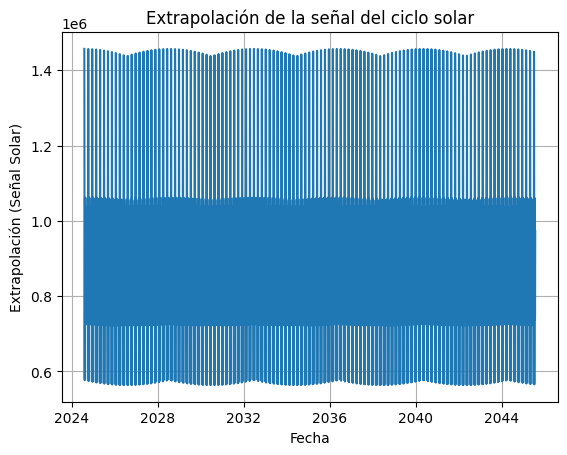

In [183]:
plt.plot(años_21, y)
plt.xlabel("Fecha")
plt.ylabel("Extrapolación (Señal Solar)")
plt.title("Extrapolación de la señal del ciclo solar")
plt.grid()
plt.show()


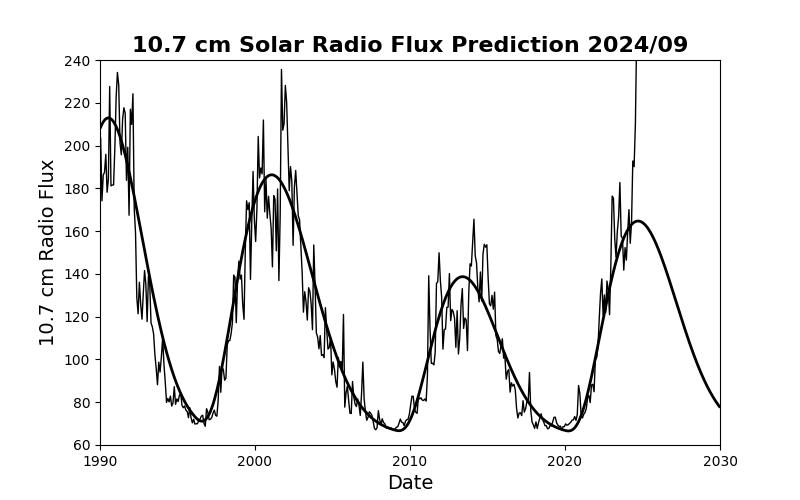
\
http://solarcyclescience.com/forecasts.html

In [184]:
manchas = y[0]
print ("manchas solares a mitad de agosto:" + str(manchas))
ciclo_ahora = np.mod(años_21[0], Periodo_ciclo_solar)
print (ciclo_ahora)


manchas solares a mitad de agosto:1456477.0743036964


TypeError: unsupported operand type(s) for %: 'Timestamp' and 'float'

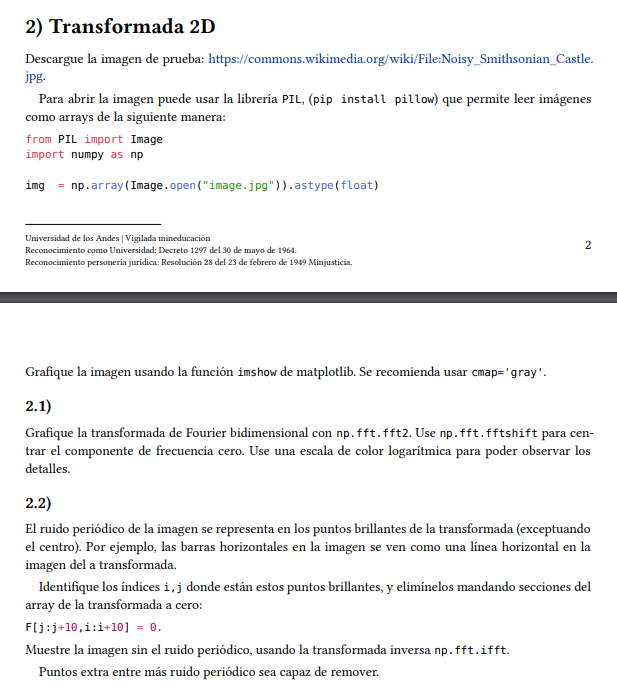

In [160]:
img = np.array(Image.open('Noisy_Smithsonian_Castle.jpg')).astype(float)